# **Description of this file:**
In this project, I select the S&P 500 daily market data from 2010 to 2019 as the research target. This index summerizes the general information of USA stock market thus it is convenient to reflect the overall trading features and track the performances. For a better precision of regression, I also take into account the mainstream asset pricing data from Fama-French multifactors theory. Since the excess return of the factors are usually confirmed as an efficient tool to describe the total risk premium, I add the three factors daily dataset into the training set and hope to see if any improvements by incuding these features.

# **The main purpose of this project are twofold as following:**

---1. By comparing the advanced deep learning models(LSTM, RNN/GRU,and CNN-LSTM) with traditional linear regression, we want to find whether these neural-nets based framework could perform better than statistical models.

---2. We want to know if combines two or more different deep learning models could significantly reduce the prections errors.


### **Load the data/Data preprocessing**

In [ ]:
#Basic packages of this task
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
from sklearn.metrics import accuracy_score
import tensorflow as tf
plt.style.use('fivethirtyeight')

In [ ]:
#store and read the data
#from google.colab import files
#files.upload()

df = pd.read_excel('sp500(final).xlsx').reset_index()

In [ ]:
#adjust and show the information
df.columns = df.columns.map(lambda x: x.replace(' ', ''))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   index                                2516 non-null   int64         
 1   Date                                 2516 non-null   datetime64[ns]
 2   Open                                 2516 non-null   float64       
 3   High                                 2516 non-null   float64       
 4   Low                                  2516 non-null   float64       
 5   Close                                2516 non-null   float64       
 6   Volume                               2516 non-null   int64         
 7   Value-WeightedReturn-incl.dividends  2516 non-null   float64       
 8   Value-WeightedReturn-excl.dividends  2516 non-null   float64       
 9   Equal-WeightedReturn-incl.dividends  2516 non-null   float64       
 10  Equal-Weight

Text(0, 0.5, 'Daily return USD ($)')

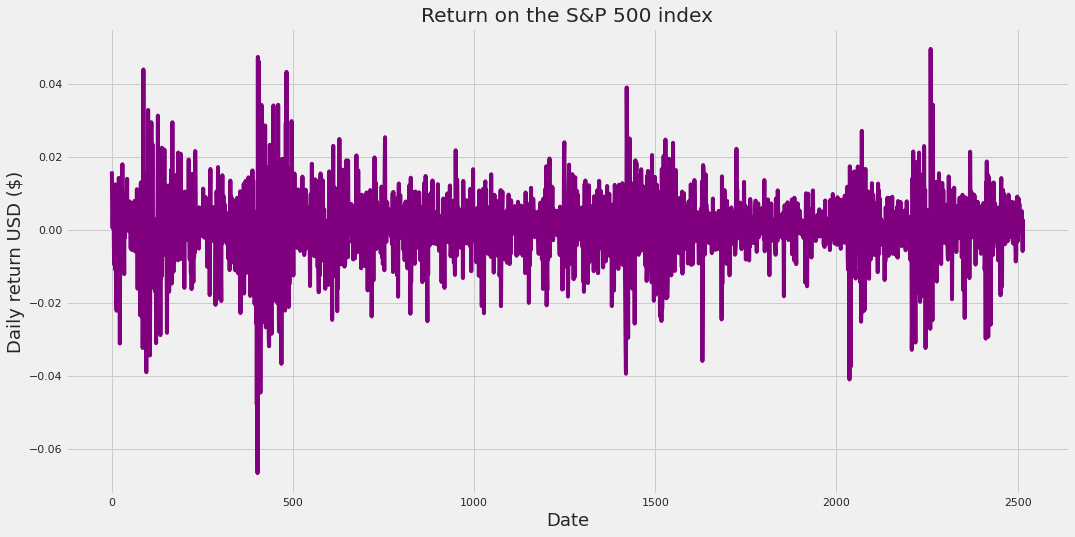

In [ ]:
#Plot the daily return data
plt.figure(figsize=(16,8))
plt.title('Return on the S&P 500 index')
plt.plot(df['return'], color='purple')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Daily return USD ($)', fontsize=18)

Text(0, 0.5, 'Close Price USD ($)')

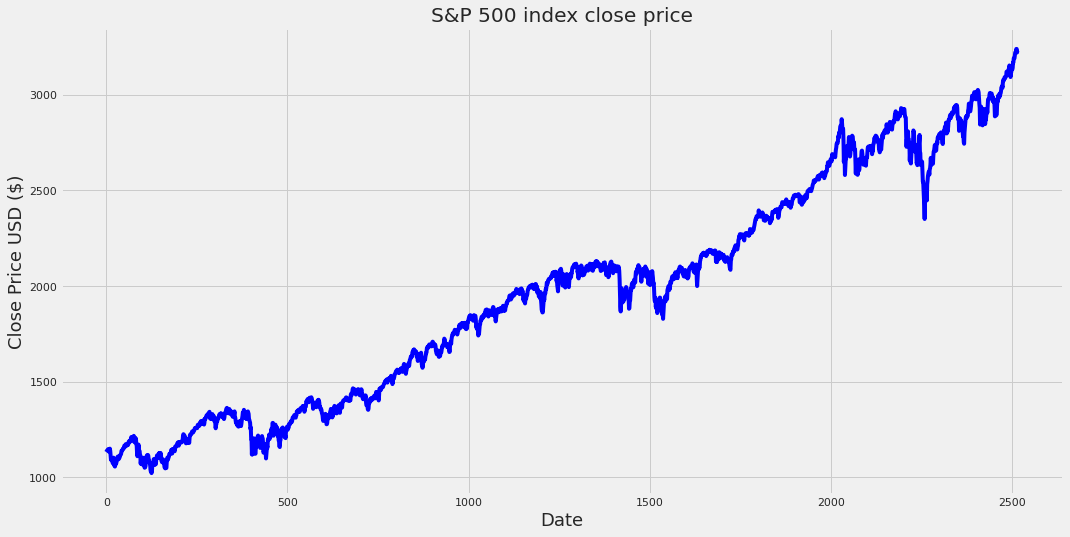

In [ ]:
#Visualize the adjusted close price of data
plt.figure(figsize=(16,8))
plt.title('S&P 500 index close price')
plt.plot(df['AdjClose'], color = 'blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
df

,index,Date,Open,High,Low,Close,Volume,Value-WeightedReturn-incl.dividends,Value-WeightedReturn-excl.dividends,Equal-WeightedReturn-incl.dividends,Equal-WeightedReturn-excl.dividends,CountofSecuritiesUsed,MarketValueofSecuritiesUsed,TotalMarketValue,f1mktrf,f2smb,f3hml,f4hmd,return,AdjClose
0,0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.017127,0.017051,0.019120,0.019077,6554,15815579100,16089218600,0.0169,0.0058,0.0112,0.0067,0.016043,1132.989990
1,1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.003374,0.003369,0.002475,0.002451,6555,16089218600,16143308200,0.0031,-0.0060,0.0119,0.0065,0.003116,1136.520020
2,2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.002046,0.001763,0.003210,0.003180,6553,16143230900,16171341200,0.0013,-0.0024,0.0057,-0.0001,0.000546,1137.140015
3,3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.002861,0.002823,0.006887,0.006834,6550,16171085400,16216729900,0.0040,0.0008,0.0093,-0.0085,0.004001,1141.689941
4,4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.004174,0.004174,0.007230,0.007224,6550,16216722300,16285963600,0.0033,0.0039,-0.0001,0.0025,0.002882,1144.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2511,2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,1296540000,0.000379,0.000269,0.003556,0.003383,7255,41035373700,41045553800,0.0001,0.0037,-0.0002,0.0013,-0.000195,3223.379883
2512,2512,2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,2160680000,0.004616,0.004528,0.003437,0.003367,7255,41045553800,41231529500,0.0048,-0.0053,-0.0002,0.0032,0.005128,3239.909912
2513,2513,2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,2428670000,-0.000643,-0.000714,-0.002284,-0.002529,7253,41231521000,41183575100,-0.0010,-0.0053,-0.0007,0.0037,0.000034,3240.020020
2514,2514,2019-12-30,3240.090088,3240.919922,3216.570068,3221.290039,3013290000,-0.005105,-0.005332,-0.001236,-0.001732,7255,41175568000,40957071500,-0.0057,0.0017,0.0059,0.0004,-0.005781,3221.290039


In [ ]:
#drop the overlapped index and features
df.drop(['index','Date'], axis =1, inplace=True)
df

,Open,High,Low,Close,Volume,Value-WeightedReturn-incl.dividends,Value-WeightedReturn-excl.dividends,Equal-WeightedReturn-incl.dividends,Equal-WeightedReturn-excl.dividends,CountofSecuritiesUsed,MarketValueofSecuritiesUsed,TotalMarketValue,f1mktrf,f2smb,f3hml,f4hmd,return,AdjClose
0,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.017127,0.017051,0.019120,0.019077,6554,15815579100,16089218600,0.0169,0.0058,0.0112,0.0067,0.016043,1132.989990
1,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.003374,0.003369,0.002475,0.002451,6555,16089218600,16143308200,0.0031,-0.0060,0.0119,0.0065,0.003116,1136.520020
2,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.002046,0.001763,0.003210,0.003180,6553,16143230900,16171341200,0.0013,-0.0024,0.0057,-0.0001,0.000546,1137.140015
3,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.002861,0.002823,0.006887,0.006834,6550,16171085400,16216729900,0.0040,0.0008,0.0093,-0.0085,0.004001,1141.689941
4,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.004174,0.004174,0.007230,0.007224,6550,16216722300,16285963600,0.0033,0.0039,-0.0001,0.0025,0.002882,1144.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,3225.449951,3226.429932,3220.510010,3223.379883,1296540000,0.000379,0.000269,0.003556,0.003383,7255,41035373700,41045553800,0.0001,0.0037,-0.0002,0.0013,-0.000195,3223.379883
2512,3227.199951,3240.080078,3227.199951,3239.909912,2160680000,0.004616,0.004528,0.003437,0.003367,7255,41045553800,41231529500,0.0048,-0.0053,-0.0002,0.0032,0.005128,3239.909912
2513,3247.229980,3247.929932,3234.370117,3240.020020,2428670000,-0.000643,-0.000714,-0.002284,-0.002529,7253,41231521000,41183575100,-0.0010,-0.0053,-0.0007,0.0037,0.000034,3240.020020
2514,3240.090088,3240.919922,3216.570068,3221.290039,3013290000,-0.005105,-0.005332,-0.001236,-0.001732,7255,41175568000,40957071500,-0.0057,0.0017,0.0059,0.0004,-0.005781,3221.290039


In [ ]:
#descrptive statistics
df.describe()

,Open,High,Low,Close,Volume,Value-WeightedReturn-incl.dividends,Value-WeightedReturn-excl.dividends,Equal-WeightedReturn-incl.dividends,Equal-WeightedReturn-excl.dividends,CountofSecuritiesUsed,MarketValueofSecuritiesUsed,TotalMarketValue,f1mktrf,f2smb,f3hml,f4hmd,return,AdjClose
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,1962.147905,1971.346574,1952.200450,1962.608854,3.715255e+09,0.000500,0.000414,0.000457,0.000372,6918.317170,2.689752e+10,2.691015e+10,0.000532,-0.000010,-0.000092,0.000189,0.000466,1962.608854
std,589.031496,590.190988,587.623893,588.910251,8.134060e+08,0.009331,0.009329,0.008652,0.008652,236.376884,7.111524e+09,7.114742e+09,0.009587,0.005171,0.005048,0.007026,0.009305,588.910251
min,1027.650024,1032.949951,1010.909973,1022.580017,1.025000e+09,-0.068747,-0.068850,-0.072385,-0.072433,6550.000000,1.473007e+10,1.473021e+10,-0.069700,-0.019800,-0.018600,-0.038100,-0.066634,1022.580017
25%,1381.642548,1390.700012,1372.800018,1384.404999,3.237625e+09,-0.003508,-0.003599,-0.003765,-0.003868,6685.000000,1.979805e+10,1.980085e+10,-0.003525,-0.003300,-0.003100,-0.003600,-0.003264,1384.404999
50%,1985.319946,1993.084961,1975.660034,1986.479981,3.587920e+09,0.000717,0.000652,0.001009,0.000915,7020.000000,2.765389e+10,2.766359e+10,0.000750,0.000000,-0.000300,0.000500,0.000596,1986.479981
75%,2434.179931,2441.522522,2427.959961,2433.967529,4.076530e+09,0.005175,0.005083,0.005265,0.005203,7111.000000,3.265984e+10,3.267318e+10,0.005325,0.003200,0.002700,0.004300,0.005049,2433.967529
max,3247.229980,3247.929932,3234.370117,3240.020020,1.061781e+10,0.051269,0.051234,0.047193,0.047104,7286.000000,4.123152e+10,4.123153e+10,0.050600,0.035800,0.030700,0.036300,0.049594,3240.020020


# **Hyper-Parameters**

In [ ]:
EPOCH = 10
BS = 16
DAYS = 30 #length of data sequence 

# **Define functions in this task**

In [ ]:
#import addtional packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

data=df[['Open','High','Low','Close','Volume',
              'Value-WeightedReturn-incl.dividends','Value-WeightedReturn-excl.dividends',
              'Equal-WeightedReturn-incl.dividends','Equal-WeightedReturn-excl.dividends',
             'CountofSecuritiesUsed','MarketValueofSecuritiesUsed','TotalMarketValue',
              'f1mktrf','f2smb','f3hml','f4hmd','return','AdjClose']]
              #return  in the last column

In [ ]:
#data preprocessing
class Customdata():
  def __init__(self,type=1):
    '''
      type: 1=raw,2=standardscaler,3=minmaxscaler
    '''
    self.type=type
    if type == 1:
      self.scaler = None
    if type == 2:
      self.scaler = StandardScaler()
    if type == 3:
      self.scaler = MinMaxScaler()

  def fit_transform(self, data):
    if self.scaler is not None:
      return self.scaler.fit_transform(data)
    else:
      return data.values
  def inverse_transform(self, data):
    if self.scaler is not None:
      return self.scaler.inverse_transform(data)
    else:
      return data

def get_data(types=2):

  scaler = Customdata(types)#StandardScaler()#MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(data)
  print(scaled_data,scaled_data.shape)

  dataset = data.values
# Get the number of rows to train the model on
  training_data_len = int(np.ceil( len(dataset) * .8 ))

  print(training_data_len)
  # Create the training data set 
  # Create the scaled training data set
  train_data = scaled_data[0:training_data_len, :]
  #target_data = target[0:int(training_data_len)]
  # Split the data into x_train and y_train data sets
  x_train = []
  y_train = []

  for i in range(DAYS, len(train_data)):
      x_train.append(train_data[i-DAYS:i,:])
      y_train.append(train_data[i,-1])
      # if i <= 31:
      #     # print(x_train)
      #     # print(y_train)
      #     print()
          
  # Convert the x_train and y_train to numpy arrays 
  x_train, y_train = np.array(x_train), np.array(y_train)

  # Reshape the data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
  print(x_train.shape,y_train.shape)

  # Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
  test_data = scaled_data[training_data_len - DAYS: , :]
  # Create the data sets x_test and y_test
  x_test = []
  y_test = scaled_data[training_data_len:,-1].copy()
  for i in range(DAYS, len(test_data)):
      x_test.append(test_data[i-DAYS:i, :])
      
  # Convert the data to a numpy array
  x_test = np.array(x_test)

  # Reshape the data
  # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  print(x_test.shape,y_test.shape)
  return x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len

In [ ]:
def get_predictions(x_test,y_test,model,scaled_data,scaler):
    # Get the models predicted price values 
    predictions = model.predict(x_test)
    print(model.evaluate(x_test,y_test))
    tmp = scaled_data[training_data_len: , :]
    raw = scaler.inverse_transform(tmp)
   # print(tmp.shape,predictions.shape)
    tmp[:,-1] = predictions.reshape(tmp.shape[0])
    tmpss = scaler.inverse_transform(tmp)
    print(tmpss.shape)

    # Get the root mean squared error (RMSE)
    # rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    # print("rmse", rmse)
    return tmpss[:,-1], predictions, raw[:,-1]
    
def draw(pred,training_data_len):
  # Plot the data
  train = df[:training_data_len].copy()
  valid = df[training_data_len:].copy()
  valid['Predictions'] = pred


  # Visualize the data
  plt.figure(figsize=(18,8))
  #plt.subplot(figure(figsize=(18,8)))
  plt.title('Model Prediction')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(train['AdjClose'])
  plt.plot(valid[['AdjClose', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='best')
  plt.show()
from keras import backend as K
def rmspe(y_true, y_pred):
  return K.sqrt(K.mean(K.square( (y_true - y_pred) /K.clip(K.abs(y_true),K.epsilon(),None) ), axis=-1) )

def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square((y_true - y_pred))))

from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error
def indexs(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  mae = mean_squared_error(y_true, y_pred)
  print('rmse:',rmse)
  print('r2:',r2)
  print('mae:',mae)
  return mse, rmse, mae, r2

# **Linear Regression training**

[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
0.002658160426406339


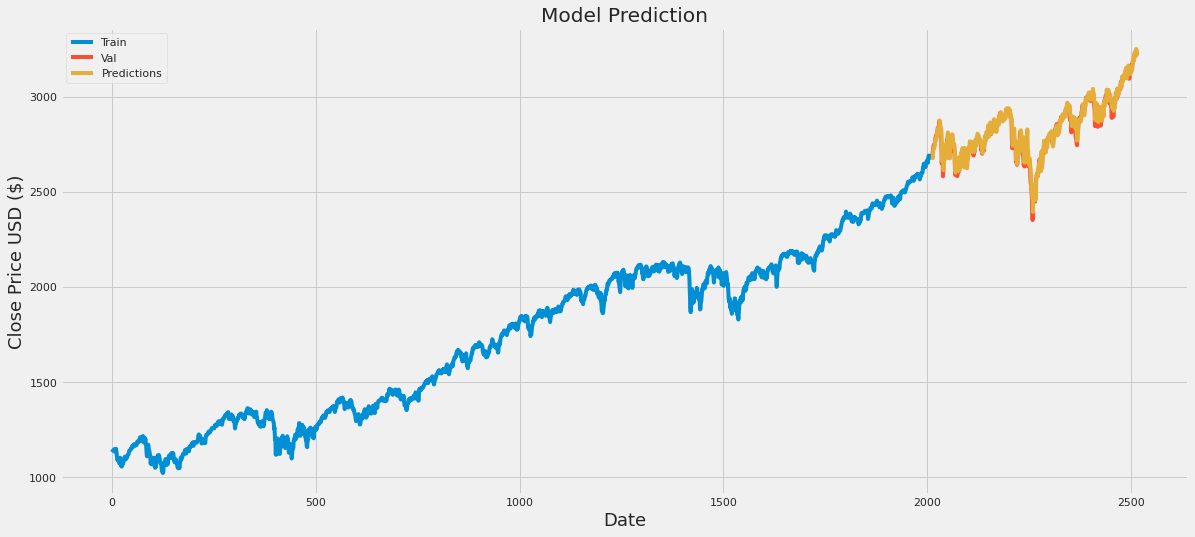

In [ ]:
#create the linear model
x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
model = LinearRegression()
model.fit(x_train.reshape((x_train.shape[0],x_train.shape[1]*x_train.shape[2])), y_train)

predicts = model.predict(x_test.reshape((x_test.shape[0],x_test.shape[1]*x_test.shape[2])))
print(sm.mean_squared_error(y_test,predicts))
tmp = scaled_data[training_data_len: , :]
raw = scaler.inverse_transform(tmp)
raw_y = raw[:,-1]
tmp[:,-1] = predicts.reshape(tmp.shape[0])
tmpss = scaler.inverse_transform(tmp)
predictss = tmpss[:,-1]
draw(predictss,training_data_len)


In [ ]:
print('raw data:')
LR_result_raw = indexs(raw_y, predictss)
print('scaled data')
LR_result_scaled = indexs(y_test, predicts)


raw data:
rmse: 30.356617891776953
r2: 0.9604885275525965
mae: 921.5242498273526
scaled data
rmse: 0.051557350847443076
r2: 0.9604885275525965
mae: 0.002658160426406339


# **Feed-forward Neural Network(BP method)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Input

# Build the NN model
nn_model = Sequential()
nn_model.add(Input(shape=(x_train.shape[1:])))
nn_model.add(Flatten())
nn_model.add(Dense(32,activation='relu'))
#nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dense(8,activation='relu'))
nn_model.add(Dense(1))

nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                17312     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 17,585
Trainable params: 17,585
Non-trainable params: 0
_________________________________________________________________


[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
Model training ...
Epoch 1/10
124/124 [==============================] - 1s 3ms/step - loss: 0.1217
Epoch 2/10
124/124 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 3/10
124/124 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 4/10
124/124 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 5/10
124/124 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 6/10
124/124 [=====

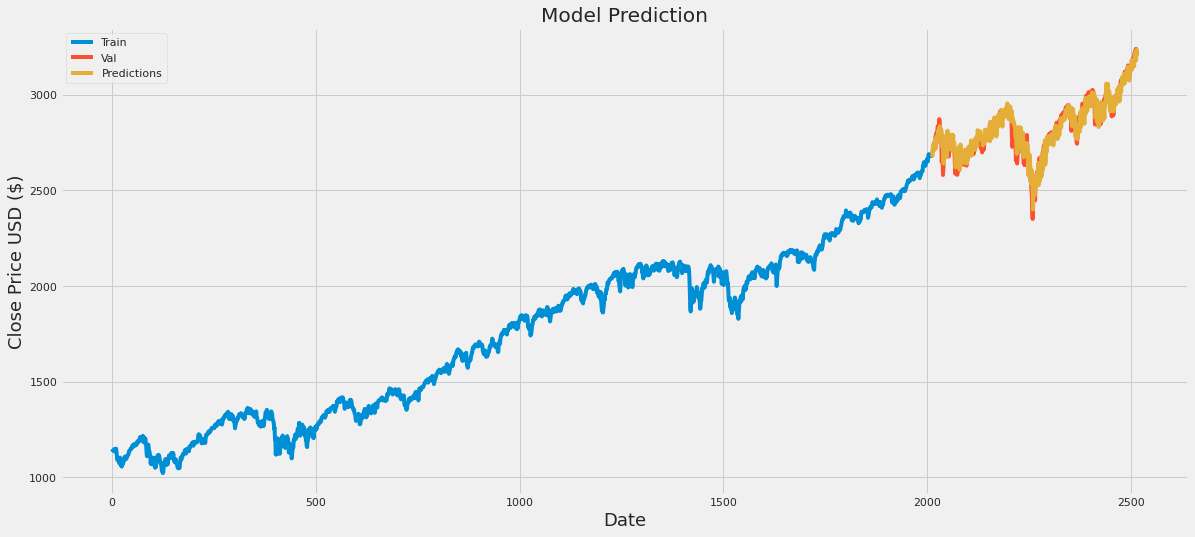

In [ ]:
#Optimize the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
# Train the model
print("Model training ...")

nn_model.fit(x_train, y_train, batch_size=BS, epochs=EPOCH)
print("Finished!")
nn_pred, predicts, raw_y = get_predictions(x_test,y_test,nn_model,scaled_data,scaler)
draw(nn_pred,training_data_len)

In [ ]:
print('raw data:')
NN_result_raw = indexs(raw_y, nn_pred)
print('scaled data')
NN_result_scaled = indexs(y_test, predicts)

raw data:
rmse: 46.324381652520735
r2: 0.9079898564285349
mae: 2145.9483354883996
scaled data
rmse: 0.07867682777325567
r2: 0.9079898564285349
mae: 0.0061900432284625355


# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1:])))
#lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dense(8))
lstm_model.add(Dense(1))

lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 64)            21248     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 33,937
Trainable params: 33,937
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
# Train the model
print("Model training ...")
lstm_model.fit(x_train, y_train, batch_size=BS, epochs=EPOCH)
print("Finished!")

[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
Model training ...
Epoch 1/10
124/124 [==============================] - 6s 14ms/step - loss: 0.0275
Epoch 2/10
124/124 [==============================] - 2s 15ms/step - loss: 0.0016
Epoch 3/10
124/124 [==============================] - 2s 15ms/step - loss: 0.0011
Epoch 4/10
124/124 [==============================] - 2s 14ms/step - loss: 0.0011
Epoch 5/10
124/124 [==============================] - 2s 14ms/step - loss: 9.9726e-04
Epoch 6/10
124/1

16/16 [==============================] - 1s 6ms/step - loss: 0.0234
0.023395178839564323
(503, 18)


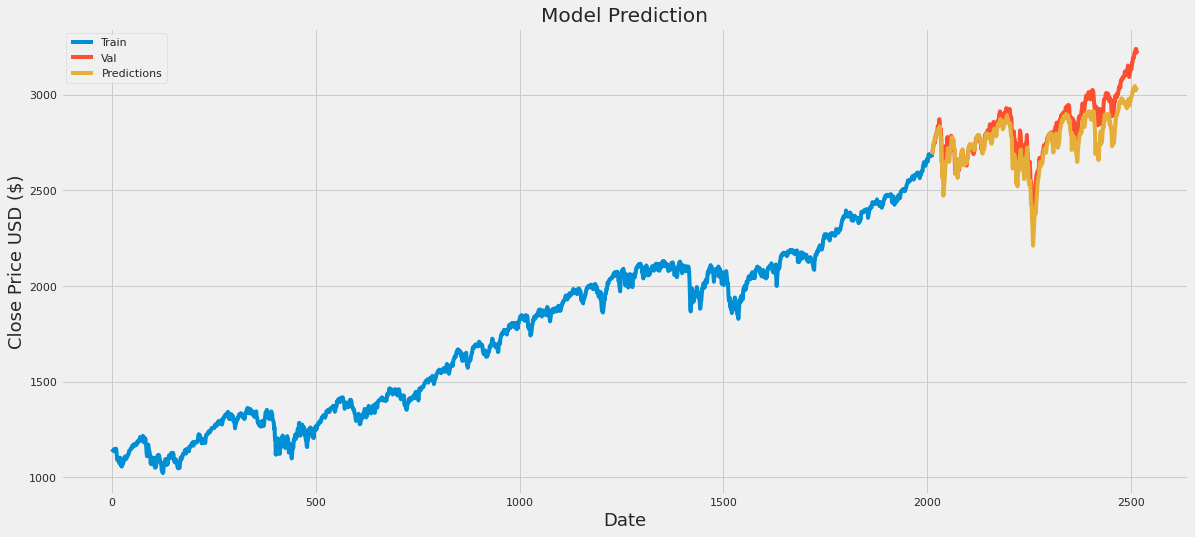

In [ ]:
#get the predictions
lstm_pred, predicts, raw_y = get_predictions(x_test,y_test,lstm_model,scaled_data,scaler)
draw(lstm_pred,training_data_len)

In [ ]:
print('raw data:')
LSTM_result_raw = indexs(raw_y, lstm_pred)
print('scaled data')
LSTM_result_scaled = indexs(y_test, predicts)

raw data:
rmse: 90.05875852570361
r2: 0.6522490235537506
mae: 8110.579987190993
scaled data
rmse: 0.15295481949761644
r2: 0.6522490235537505
mae: 0.023395176807548428


# RNN(GRU)

In [ ]:
from keras.layers import Dense, GRU
rnn_model = Sequential()
rnn_model.add(GRU(64, return_sequences=True, input_shape= (x_train.shape[1:])))
#rnn_model.add(GRU(32, return_sequences=True))
rnn_model.add(GRU(32, return_sequences=False))
rnn_model.add(Dense(8))
rnn_model.add(Dense(1))
rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 30, 64)            16128     
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 25,809
Trainable params: 25,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#add loss function and optimize the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
# Train the model
print("Model training ...")
rnn_model.fit(x_train, y_train, batch_size=BS, epochs=EPOCH)
print("Finished!")

[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
Model training ...
Epoch 1/10
124/124 [==============================] - 5s 14ms/step - loss: 0.0112
Epoch 2/10
124/124 [==============================] - 2s 14ms/step - loss: 0.0013
Epoch 3/10
124/124 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 4/10
124/124 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 5/10
124/124 [==============================] - 2s 14ms/step - loss: 0.0012
Epoch 6/10
124/124 [

16/16 [==============================] - 1s 6ms/step - loss: 0.0132
0.013158847577869892
(503, 18)


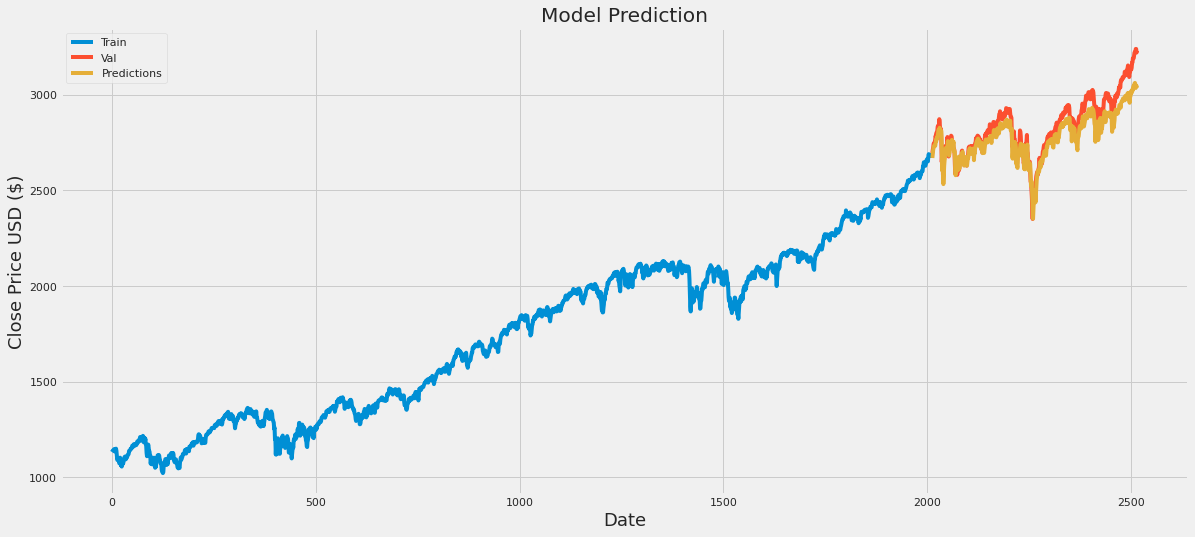

In [ ]:
#get the predictions
rnn_pred, predicts, raw_y = get_predictions(x_test,y_test,rnn_model,scaled_data,scaler)
draw(rnn_pred,training_data_len)

In [ ]:
print('raw data:')
RNN_result_raw = indexs(raw_y, rnn_pred)
print('scaled data')
RNN_result_scaled = indexs(y_test, predicts)

raw data:
rmse: 67.54165820352102
r2: 0.8044040383849045
mae: 4561.87559288126
scaled data
rmse: 0.11471202033215627
r2: 0.8044040383849045
mae: 0.013158847608685034


# **CNN-LSTM**

In [ ]:
x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
days= x_train.shape[1]
x_train_2d = x_train.reshape(-1,days//5,5,18)
x_test_2d = x_test.reshape(-1,days//5,5,18)
from keras.layers import Conv2D,MaxPool2D,Dropout, Reshape
cnnlstm_model = Sequential()

cnnlstm_model.add(Conv2D(16,(3,3),activation ='relu', input_shape= (x_train_2d.shape[1:])))

#cnnlstm_model.add(MaxPool2D(2,2))
cnnlstm_model.add(Reshape((-1,16)))
cnnlstm_model.add(LSTM(32, return_sequences=True))
cnnlstm_model.add(LSTM(32, return_sequences=False))
cnnlstm_model.add(Dense(16))
cnnlstm_model.add(Dense(1))
cnnlstm_model.summary()

#cnnlstm_model.add(Dropout(0.25))


[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 4, 3, 16)          2608      
_________________________________________________________________
reshape_2 (Reshape)          (None, 12, 16)            0         
_________________________________________________________________
lstm_6 (LSTM)                (N

Model training ...
Epoch 1/10
124/124 [==============================] - 5s 9ms/step - loss: 0.0295
Epoch 2/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0033
Epoch 3/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 4/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 5/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 6/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0013
Epoch 7/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0014
Epoch 8/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 9/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 10/10
124/124 [==============================] - 1s 9ms/step - loss: 9.0699e-04
Finished!
16/16 [==============================] - 1s 4ms/step - loss: 0.0506
0.050595689564943314
(503, 18)


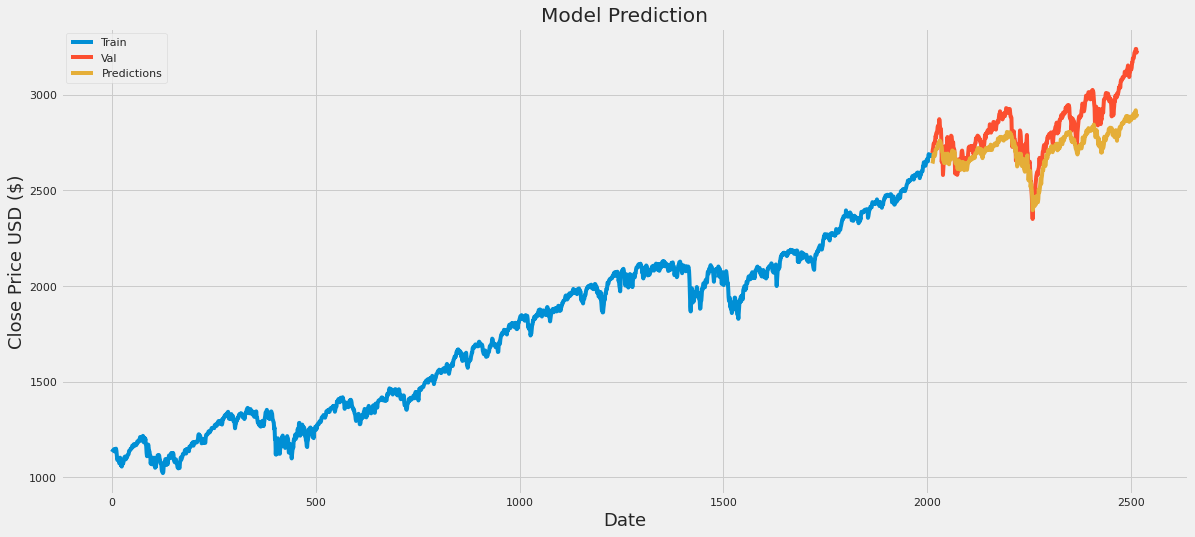

In [ ]:
cnnlstm_model.compile(optimizer='adam', loss='mean_squared_error')


# Train the model
print("Model training ...")


cnnlstm_model.fit(x_train_2d, y_train, batch_size=BS, epochs=EPOCH)
print("Finished!")
cnnlstm_pred, predicts, raw_y = get_predictions(x_test_2d,y_test,cnnlstm_model,scaled_data,scaler)
draw(cnnlstm_pred,training_data_len)

In [ ]:
print('raw data:')
CNNLSTM_result_raw = indexs(raw_y, cnnlstm_pred)
print('scaled data')
CNNLSTM_result_scaled = indexs(y_test, predicts)

raw data:
rmse: 132.44011854925273
r2: 0.2479346703820955
mae: 17540.385001340117
scaled data
rmse: 0.22493486206743826
r2: 0.2479346703820955
mae: 0.05059569217329748


# **CNN-GRU**

In [ ]:
cnngru_model = Sequential()
x_train,y_train,x_test,y_test,scaler,scaled_data,training_data_len = get_data()
days= x_train.shape[1]
x_train_2d = x_train.reshape(-1,days//5,5,18)
x_test_2d = x_test.reshape(-1,days//5,5,18)
cnngru_model.add(Conv2D(16,(3,3),activation ='relu', input_shape= (x_train_2d.shape[1:])))

#cnngru_model.add(MaxPool2D(2,2))
cnngru_model.add(Reshape((-1,16)))
cnngru_model.add(GRU(32, return_sequences=True))
cnngru_model.add(GRU(32, return_sequences=False))
cnngru_model.add(Dense(8))
cnngru_model.add(Dense(1))
cnngru_model.summary()

#cnngru_model.add(Dropout(0.25))

[[-1.43584162 -1.41927457 -1.42234942 ...  0.92690257  1.6744513
  -1.40901569]
 [-1.40850323 -1.41459717 -1.40005186 ...  0.89843193  0.28479561
  -1.40302032]
 [-1.40332433 -1.41025883 -1.39274997 ... -0.04109911  0.00851906
  -1.40196733]
 ...
 [ 2.18212021  2.1634304   2.18239007 ...  0.499843   -0.04646799
   2.16954128]
 [ 2.1699964   2.15155051  2.15209248 ...  0.03007749 -0.67152542
   2.13773048]
 [ 2.12769796  2.13595932  2.14436484 ... -0.71015909  0.26655873
   2.15384818]] (2516, 18)
2013
(1983, 30, 18) (1983,)
(503, 30, 18) (503,)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 4, 3, 16)          2608      
_________________________________________________________________
reshape_3 (Reshape)          (None, 12, 16)            0         
_________________________________________________________________
gru_6 (GRU)                  (N

Model training ...
Epoch 1/10
124/124 [==============================] - 4s 8ms/step - loss: 0.0439
Epoch 2/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0038
Epoch 3/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 4/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0019
Epoch 5/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 6/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 7/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 8/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 9/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 10/10
124/124 [==============================] - 1s 8ms/step - loss: 8.9095e-04
Finished!
16/16 [==============================] - 1s 4ms/step - loss: 0.0429
0.042909689247608185
(503, 18)


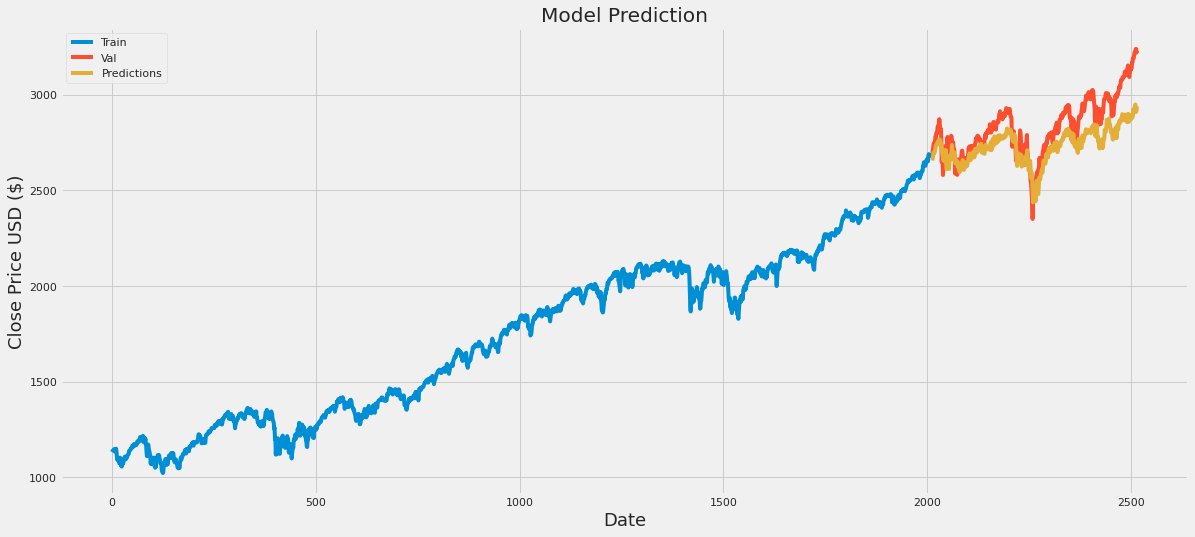

In [ ]:
cnngru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
print("Model training ...")
cnngru_model.fit(x_train_2d, y_train, batch_size=BS, epochs=EPOCH)
print("Finished!")

cnngru_pred, predicts, raw_y = get_predictions(x_test_2d,y_test,cnngru_model,scaled_data,scaler)
draw(cnngru_pred,training_data_len)

In [ ]:
print('raw data:')
CNNGRU_result_raw = indexs(raw_y, cnngru_pred)
print('scaled data')
CNNGRU_result_scaled = indexs(y_test, predicts)

raw data:
rmse: 121.96647763289643
r2: 0.36218106251060433
mae: 14875.821666175823
scaled data
rmse: 0.20714654383976797
r2: 0.36218106251060433
mae: 0.04290969062476092


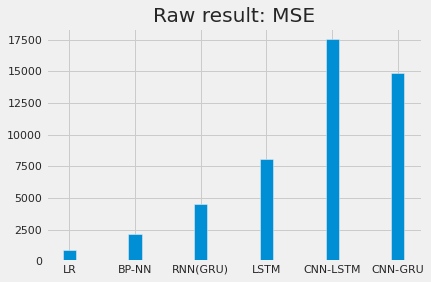

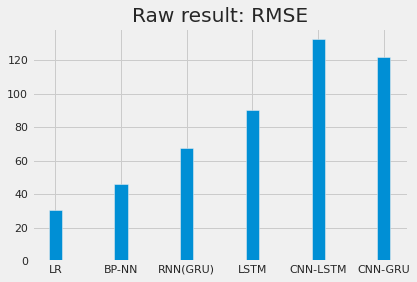

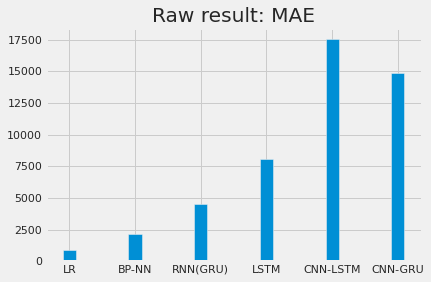

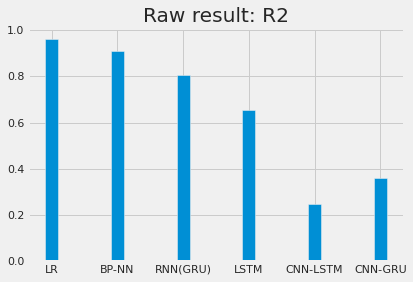

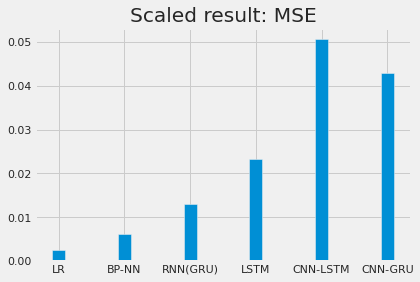

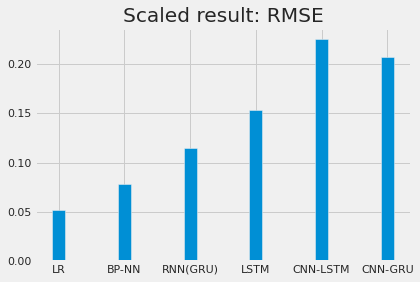

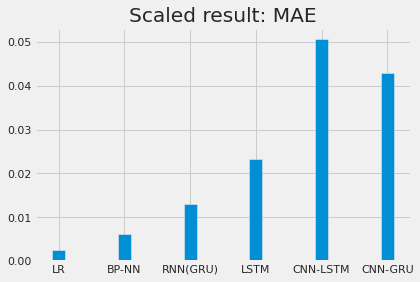

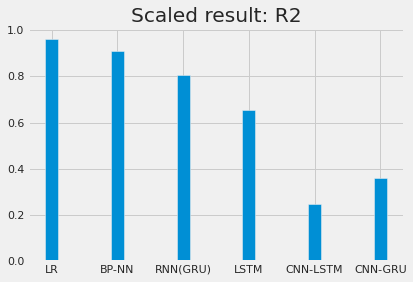

In [ ]:
# print('RMSE of linear regression is :', rmse_model)
# print('RMSE of feed-forward NN model is :',rmse_nn)
# print('RMSE of LSTM model is :',rmse_lstm)
# print('RMSE of RNN/GRU model is :',rmse_rnn)
# print('RMSE of CNN-LSTM model is :',rmse_CNN_LSTM)
# print('RMSE of CNN-GRU model is:',rmse_CNN_GRU)

name_list = ['LR', 'BP-NN', 'RNN(GRU)', 'LSTM', 'CNN-LSTM', 'CNN-GRU']
zipped_result_raw = list(zip(LR_result_raw, NN_result_raw, RNN_result_raw, LSTM_result_raw, CNNLSTM_result_raw, CNNGRU_result_raw))
zipped_result_scaled = list(zip(LR_result_scaled, NN_result_scaled, RNN_result_scaled, LSTM_result_scaled, CNNLSTM_result_scaled, CNNGRU_result_scaled))

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_raw[0], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Raw result: MSE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_raw[1], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Raw result: RMSE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_raw[2], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Raw result: MAE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_raw[3], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Raw result: R2')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_scaled[0], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Scaled result: MSE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_scaled[1], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Scaled result: RMSE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_scaled[2], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Scaled result: MAE')
plt.show()

x_idx = list(range(len(name_list)))
width = 0.2
plt.bar(x_idx, zipped_result_scaled[3], width=width)
plt.xticks(ticks=x_idx, labels=name_list)
plt.title('Scaled result: R2')
plt.show()

# Predictions results: 
we can easily to find that our optimal model to get the highest accuracy of predictions is the **LR** method, which exhibits the lowest **RMSE** and highest R square value. While the **LSTM** shows the similar ability as the three layers BP feed-forward networks. The main possible reason is that the MLP was added more dense layers than **LSTM** and **RNN(GRU)**, thus leading to more complexities and improve the results during dot product calculations. Apart from all neural network models, the **linear regression** method seems to has the best performance, which made us surprised. We guess the main reason is that these features we selected have reltively sensitivities with each other and nonlinearties are less sensitive to affect the result.

In addition,  although both **CNN-LSTM** and **CNN-GRU** joint frameworks perform worse than traditional **MLP** and **LSTM** tools, whereas the **GRU** is still the optimal choice among these upgraded hybrid models. This maybe be not in accordance with our expected assumption(The **CNN-based** mixed models can improve the predicted capacities). However, since the total features that we included into the traning datasets(16) are not big enough, the **CNN-LSTM(GRU)** may not show its real powers to strengthen the whole processes. On the other hand, we could try to exchange the orders of CNN and RNN layers in order to improve the stacked layers frameworks. 

In the future, we plan to select more economic and appropriate features,such as the Moving average prices indicators(**Short terms**, **medium terms**, **long terms**),**peer/cross-market** prices comparisons,and macro datasets(Eg: **exchange rate**, **Libor**,etc) to further enrich our study and make our predictions more efficient. Another limitation is that we did not apply noise decomposition into time series analysis. The financial data normally exhibit **negative skewness**, **leptokurtic**,and **volatility clustering** phenomenons. We suppose our results from the above work will be highly possible improved if the noise deduction structures are applied into these DL models.